Challenge:

Firstly the overfit is a problem, even though it was poor in the first place. We could go back and clean up our feature set. There might be some gains to be made by getting rid of the noise.

We could take our regression problem and turn it into a classifier. With this number of features and a discontinuous outcome, we might have better luck thinking of this as a classification problem. We could make it simpler still by instead of classifying on each possible value, group reviews to some decided high and low values. And that is your challenge.

Transform this regression problem into a binary classifier and clean up the feature set. You can choose whether or not to include nutritional information, but try to cut your feature set down to the 30 most valuable features.

Good luck!

When you've finished that, also take a moment to think about bias. Is there anything in this dataset that makes you think it could be biased, perhaps extremely so?

There is. Several things in fact, but most glaringly is that we don't actually have a random sample. It could be, and probably is, that the people more likely to choose some kinds of recipes are more likely to give high reviews.

After all, people who eat chocolate might just be happier people.

In [1]:
# Import some libraries and packages:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.preprocessing import normalize
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from scipy.stats.mstats import winsorize
%matplotlib inline

import warnings
warnings.filterwarnings(action="ignore")

In [2]:
# Load dataset:
df = pd.read_csv(r'C:\Users\mebra.DESKTOP-L12LJA6\Thinkful Works\PythonThinkful\epi_r.csv')

In [3]:
# Look at the dataset:
df.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# Look at the shape of dataset:
df.shape

(20052, 680)

In [5]:
# Look at the type of columns:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20052 entries, 0 to 20051
Columns: 680 entries, title to turkey
dtypes: float64(679), object(1)
memory usage: 104.0+ MB


- Firstly the overfit is a problem, even though it was poor in the first place. We could go back and clean up our feature set. There might be some gains to be made by getting rid of the noise.

First applying SVC model without removing outliers:

In [6]:
# Find out number of uniquevalue and notnull in each columns:
df.nunique()

title                    17736
rating                       8
calories                  1858
protein                    282
fat                        326
sodium                    2434
#cakeweek                    2
#wasteless                   2
22-minute meals              2
3-ingredient recipes         2
30 days of groceries         2
advance prep required        2
alabama                      2
alaska                       2
alcoholic                    2
almond                       2
amaretto                     2
anchovy                      2
anise                        2
anniversary                  2
anthony bourdain             2
aperitif                     2
appetizer                    2
apple                        2
apple juice                  2
apricot                      2
arizona                      2
artichoke                    2
arugula                      2
asian pear                   2
                         ...  
walnut                       2
wasabi  

In [7]:
# Findout number of null in each columns:
null_count = df.isnull().sum()
null_count[null_count>0]

calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

In [8]:
# Findout object column: 
df.select_dtypes(include=['object'])

,title
0,"Lentil, Apple, and Turkey Wrap"
1,Boudin Blanc Terrine with Red Onion Confit
2,Potato and Fennel Soup Hodge
3,Mahi-Mahi in Tomato Olive Sauce
4,Spinach Noodle Casserole
5,The Best Blts
6,Ham and Spring Vegetable Salad with Shallot Vi...
7,Spicy-Sweet Kumquats
8,Korean Marinated Beef
9,Ham Persillade with Mustard Potato Salad and M...


In [9]:
# Look at the columns:
list(df.columns)

['title',
 'rating',
 'calories',
 'protein',
 'fat',
 'sodium',
 '#cakeweek',
 '#wasteless',
 '22-minute meals',
 '3-ingredient recipes',
 '30 days of groceries',
 'advance prep required',
 'alabama',
 'alaska',
 'alcoholic',
 'almond',
 'amaretto',
 'anchovy',
 'anise',
 'anniversary',
 'anthony bourdain',
 'aperitif',
 'appetizer',
 'apple',
 'apple juice',
 'apricot',
 'arizona',
 'artichoke',
 'arugula',
 'asian pear',
 'asparagus',
 'aspen',
 'atlanta',
 'australia',
 'avocado',
 'back to school',
 'backyard bbq',
 'bacon',
 'bake',
 'banana',
 'barley',
 'basil',
 'bass',
 'bastille day',
 'bean',
 'beef',
 'beef rib',
 'beef shank',
 'beef tenderloin',
 'beer',
 'beet',
 'bell pepper',
 'berry',
 'beverly hills',
 'birthday',
 'biscuit',
 'bitters',
 'blackberry',
 'blender',
 'blue cheese',
 'blueberry',
 'boil',
 'bok choy',
 'bon appétit',
 'bon app��tit',
 'boston',
 'bourbon',
 'braise',
 'bran',
 'brandy',
 'bread',
 'breadcrumbs',
 'breakfast',
 'brie',
 'brine',
 'brisk

In [10]:
# Look at the statistical information about dataset:
df.describe()

,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
count,20052.000000,1.593500e+04,15890.000000,1.586900e+04,1.593300e+04,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,...,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000
mean,3.714467,6.322958e+03,100.160793,3.468775e+02,6.225975e+03,0.000299,0.000050,0.000848,0.001346,0.000349,...,0.001247,0.026332,0.000050,0.000299,0.014861,0.000150,0.000349,0.001396,0.000948,0.022741
std,1.340829,3.590460e+05,3840.318527,2.045611e+04,3.333182e+05,0.017296,0.007062,0.029105,0.036671,0.018681,...,0.035288,0.160123,0.007062,0.017296,0.121001,0.012231,0.018681,0.037343,0.030768,0.149080
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.750000,1.980000e+02,3.000000,7.000000e+00,8.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.375000,3.310000e+02,8.000000,1.700000e+01,2.940000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.375000,5.860000e+02,27.000000,3.300000e+01,7.110000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,3.011122e+07,236489.000000,1.722763e+06,2.767511e+07,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


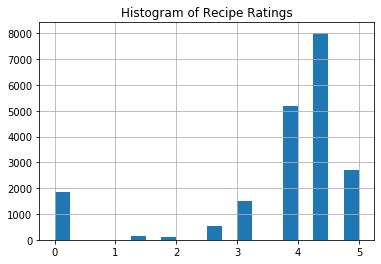

In [11]:
# Look at the rating by using hist:
df.rating.hist(bins=20)
plt.title('Histogram of Recipe Ratings')
plt.show()

In [12]:
# Drop duplicates:
df.drop_duplicates(inplace=True) 

In [13]:
# Using SVR model for prediction with out cleaning dataset:
svr = SVR()
X = df.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium'], 1).sample(frac=0.3, replace=True, random_state=1)
Y = df.rating.sample(frac=0.3, replace=True, random_state=1)
svr.fit(X,Y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

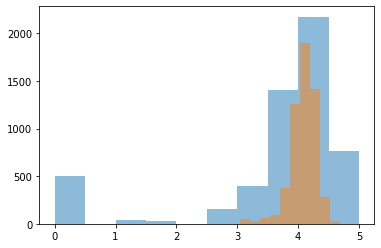

In [14]:
# Using Hist to compare actuals with predicted:
plt.hist(Y, alpha=0.5, label="Y")
plt.hist(svr.predict(X), alpha=0.5, label="Predict")
plt.show()

In [15]:
# Findout the score of full fit model:
svr.score(X, Y)

0.02764934216978476

In [16]:
# Findout the score of cross validation:
#score = cross_val_score(svr, X, Y, cv=10) 
#print( 'Accuracy of dataset in svr model: %0.2f (+/- %0.2f)' % (score.mean(), score.std() * 2))

As you can see the average score is around 0.01 which means the model does not have enough accuracy.

- Data cleaning:

In [17]:
# Find out missing value:
null_count = df.isnull().sum()
filling_list = df.columns[df.isnull().any()]
print(filling_list)

Index(['calories', 'protein', 'fat', 'sodium'], dtype='object')


In [18]:
# Filling missing values:
for col in filling_list:
      df.loc[:,filling_list] = df.loc[:,filling_list].fillna(df.loc[:,filling_list].mean())

In [19]:
# Using SVR model for prediction after filling null values:
svr = SVR()
X = df.drop(['rating', 'title'], 1).sample(frac=0.3, replace=True, random_state=1)
Y = df.rating.sample(frac=0.3, replace=True, random_state=1)
svr.fit(X,Y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [20]:
# Findout the score of full fit model:
svr.score(X, Y)

0.2211745634013782

In [21]:
# Findout the score of cross validation:
#score = score = cross_val_score(svr, X, Y, cv=10) 
#print( 'Accuracy of dataset in svr model: %0.2f (+/- %0.2f)' % (score.mean(), score.std() * 2))

As you can see after filling missing values, the score of accuracy is increased but the model does not have enough accuracy and didnt seem work well.

Now finding outlier and getting ride of the noise:

In [22]:
# Drop object column:
df1 = df.drop(['title', 'rating'], axis = 1)
df1.shape

(18251, 678)

In [23]:
# Using Tukey's method to see number of outliers in each columns:

for i,col in enumerate(df1):
    q75,q25=np.percentile(df1[col],[75,25])
    iqr=q75-q25                            
    min_val=q25-(iqr*5)                   
    max_val=q75+(iqr*5)
    print("Number of outliers and percentage of it in col {}, {} : {} and {}".format(i, col,
           len((np.where((df1[col] > max_val)|(df1[col] < min_val))[0])),
           len((np.where((df1[col] > max_val)|(df1[col] < min_val))[0]))*100/18251))


Number of outliers and percentage of it in col 0, calories : 3792 and 20.776943729110734
Number of outliers and percentage of it in col 1, protein : 33 and 0.18081201030080543
Number of outliers and percentage of it in col 2, fat : 51 and 0.27943674319215384
Number of outliers and percentage of it in col 3, sodium : 83 and 0.45476960166566216
Number of outliers and percentage of it in col 4, #cakeweek : 6 and 0.032874910963782804
Number of outliers and percentage of it in col 5, #wasteless : 1 and 0.005479151827297134
Number of outliers and percentage of it in col 6, 22-minute meals : 17 and 0.09314558106405128
Number of outliers and percentage of it in col 7, 3-ingredient recipes : 27 and 0.14793709933702262
Number of outliers and percentage of it in col 8, 30 days of groceries : 7 and 0.03835406279107994
Number of outliers and percentage of it in col 9, advance prep required : 103 and 0.5643526382116049
Number of outliers and percentage of it in col 10, alabama : 3 and 0.016437455481

Number of outliers and percentage of it in col 140, cod : 72 and 0.3944989315653937
Number of outliers and percentage of it in col 141, coffee : 180 and 0.9862473289134842
Number of outliers and percentage of it in col 142, coffee grinder : 14 and 0.07670812558215988
Number of outliers and percentage of it in col 143, cognac/armagnac : 84 and 0.4602487534929593
Number of outliers and percentage of it in col 144, collard greens : 29 and 0.1588954029916169
Number of outliers and percentage of it in col 145, colorado : 16 and 0.08766642923675415
Number of outliers and percentage of it in col 146, columbus : 3 and 0.016437455481891402
Number of outliers and percentage of it in col 147, condiment : 81 and 0.4438112980110679
Number of outliers and percentage of it in col 148, condiment/spread : 725 and 3.9723850747904224
Number of outliers and percentage of it in col 149, connecticut : 11 and 0.06027067010026848
Number of outliers and percentage of it in col 150, cook like a diner : 4 and 0.

Number of outliers and percentage of it in col 304, kale : 135 and 0.7396854966851132
Number of outliers and percentage of it in col 305, kansas : 3 and 0.016437455481891402
Number of outliers and percentage of it in col 306, kansas city : 2 and 0.010958303654594269
Number of outliers and percentage of it in col 307, kentucky : 3 and 0.016437455481891402
Number of outliers and percentage of it in col 308, kentucky derby : 38 and 0.2082077694372911
Number of outliers and percentage of it in col 309, kid-friendly : 1681 and 9.210454221686483
Number of outliers and percentage of it in col 310, kidney friendly : 2015 and 11.040490932003726
Number of outliers and percentage of it in col 311, kirsch : 30 and 0.16437455481891403
Number of outliers and percentage of it in col 312, kitchen olympics : 1 and 0.005479151827297134
Number of outliers and percentage of it in col 313, kiwi : 34 and 0.18629116212810257
Number of outliers and percentage of it in col 314, kosher : 0 and 0.0
Number of out

Number of outliers and percentage of it in col 456, peanut butter : 32 and 0.1753328584735083
Number of outliers and percentage of it in col 457, peanut free : 0 and 0.0
Number of outliers and percentage of it in col 458, pear : 269 and 1.4738918415429292
Number of outliers and percentage of it in col 459, pecan : 317 and 1.7368911292531917
Number of outliers and percentage of it in col 460, pennsylvania : 32 and 0.1753328584735083
Number of outliers and percentage of it in col 461, pepper : 554 and 3.0354501123226125
Number of outliers and percentage of it in col 462, pernod : 53 and 0.2903950468467481
Number of outliers and percentage of it in col 463, persian new year : 4 and 0.021916607309188537
Number of outliers and percentage of it in col 464, persimmon : 11 and 0.06027067010026848
Number of outliers and percentage of it in col 465, peru : 2 and 0.010958303654594269
Number of outliers and percentage of it in col 466, pescatarian : 0 and 0.0
Number of outliers and percentage of i

Number of outliers and percentage of it in col 613, tarragon : 224 and 1.227330009314558
Number of outliers and percentage of it in col 614, tart : 8 and 0.043833214618377074
Number of outliers and percentage of it in col 615, tea : 103 and 0.5643526382116049
Number of outliers and percentage of it in col 616, tennessee : 2 and 0.010958303654594269
Number of outliers and percentage of it in col 617, tequila : 87 and 0.4766862089748507
Number of outliers and percentage of it in col 618, tested & improved : 1 and 0.005479151827297134
Number of outliers and percentage of it in col 619, texas : 22 and 0.12054134020053696
Number of outliers and percentage of it in col 620, thanksgiving : 1282 and 7.0242726425949265
Number of outliers and percentage of it in col 621, thyme : 302 and 1.6547038518437347
Number of outliers and percentage of it in col 622, tilapia : 11 and 0.06027067010026848
Number of outliers and percentage of it in col 623, tofu : 90 and 0.4931236644567421
Number of outliers 

In [24]:
# Winsorized outlier columns:
df_winsorized={}
for i,col in enumerate(df1):
   df_winsorized[f'{col}']= winsorize(df1[col], (0.1, 0.1))

In [25]:
# Convert to data frame:
df_winsorized = pd.DataFrame.from_dict(df_winsorized)
df_winsorized['rating'] = df['rating']

In [26]:
df_winsorized.head()

,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,advance prep required,...,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey,rating
0,426.000000,30.00000,7.000000,559.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.500
1,403.000000,18.00000,23.000000,1439.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.375
2,165.000000,6.00000,7.000000,165.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.750
3,6622.096194,92.22792,363.394533,6573.827736,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.000
4,547.000000,20.00000,32.000000,452.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.125


In [27]:
# Delet outlier from dataset:
#Q1 = df1.quantile(0.25)
#Q3 = df1.quantile(0.75)
#IQR = Q3 - Q1
#df_winsorized = df_winsorized[~((df_winsorized < (Q1 - 5 * IQR)) |(df_winsorized > (Q3 + 5 * IQR))).any(axis=1)]


In [28]:
# Using SVR model for prediction after removing outlier:
svr = SVR()
X = df_winsorized.drop(['rating'], axis = 1)
Y = df['rating']
svr.fit(X,Y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [29]:
# Findout the score of full fit model:
svr.score(X, Y) # R^2

0.09578278777705351

In [30]:
# Findout the score of cross validation:
#score = cross_val_score(svr, X, Y, cv=10) 
#print( 'Accuracy of dataset in svr model: %0.2f (+/- %0.2f)' % (score.mean(), score.std() * 2))

As you can see after winsorizing some outlier the score of accuracy decreased. So, winsorised not affected.

In [31]:
# Findout top correlation between rating and other columns:
df.corr()[['rating']].sort_values(by = 'rating', ascending=False).head(30)

,rating
rating,1.000000
bon appétit,0.126677
peanut free,0.099805
soy free,0.096472
tree nut free,0.083888
bake,0.080175
roast,0.072893
fall,0.068616
sauté,0.067584
kosher,0.061303


In [32]:
# Using SVR model for prediction: 
svr = SVR()                       
X = df[['bon appétit', 'peanut free', 'soy free', 'tree nut free','bake', 'roast', 'fall', 'sauté', 'kosher', 'dinner', 'pescatarian', 'winter', 'onion', 'quick & easy', 'high fiber', 'thanksgiving', 'grill/barbecue', 'tomato', 'gourmet', 'no sugar added', 'pork', 'herb', 'mixer', 'cheese', 'beef', 'low carb', 'sugar conscious', 'goat cheese', 'braise']]
Y = df['rating']
svr.fit(X,Y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

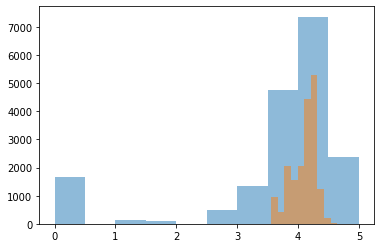

In [33]:
# Using Hist to compare actuals with predicted:
plt.hist(Y, alpha=0.5, label="Y")
plt.hist(svr.predict(X), alpha=0.5, label="Predict")
plt.show()

In [34]:
# Findout the score of full fit model:
svr.score(X, Y)

-0.018573916398540558

In [35]:
# Findout the score of cross validation:
#score = cross_val_score(svr, X, Y, cv=5)
#print( 'Accuracy of dataset in svr model: %0.2f (+/- %0.2f)' % (score.mean(), score.std() * 2))

still decreased.

In [36]:
# Applying PCA for feature reduction: ###??? applying pca on winsor feature??????
X = df.drop(['rating', 'title'], axis = 1)
Y = df['rating']      

x = StandardScaler().fit_transform(X)
pca = PCA(0.90)
principalComponents = pca.fit_transform(x)

In [37]:
# Look at the pca components:
print(abs( pca.components_ ))

[[2.50722142e-03 1.68404196e-03 2.64765735e-03 ... 9.61472118e-05
  3.95681742e-03 2.45067955e-02]
 [1.57206674e-02 1.00311041e-02 1.57477519e-02 ... 7.88428797e-04
  1.81359571e-03 3.59736648e-02]
 [3.01569194e-02 2.59267674e-02 2.99109323e-02 ... 6.54080654e-03
  4.11952260e-03 2.37660793e-02]
 ...
 [1.89192302e-03 1.64482213e-02 5.77813337e-04 ... 3.24951522e-03
  2.91150622e-03 3.12022268e-02]
 [2.45238753e-03 1.04653628e-02 3.92128072e-03 ... 1.02359231e-02
  1.24572648e-02 3.76952142e-03]
 [5.08631757e-05 3.64798333e-03 7.77504620e-04 ... 2.23892926e-05
  7.44984223e-04 5.53044662e-02]]


In [38]:
# Findout number of components explained 90% of variance in the dataset:
pca_number = pca.n_components_
print(pca_number)

535


In [39]:
# print the percentage of total variance in the dataset explained by each components:
print(
    'The percentage of total variance in the dataset explained by each, component from Sklearn PCA.\n',
    pca.explained_variance_ratio_ ,pca.explained_variance_ratio_.sum() 
)

The percentage of total variance in the dataset explained by each, component from Sklearn PCA.
 [0.01093717 0.00909539 0.00729476 0.00556377 0.00534472 0.00474995
 0.00440515 0.00403666 0.00383189 0.00365196 0.00363063 0.00349891
 0.00342596 0.00337791 0.00334079 0.0033071  0.00316072 0.00313441
 0.00309962 0.00304382 0.00301651 0.0029772  0.00294876 0.00291444
 0.00285371 0.00280265 0.00279958 0.0027719  0.00274829 0.00274538
 0.00271545 0.00270396 0.00267639 0.00266259 0.00265234 0.00260625
 0.00259221 0.00257832 0.00256554 0.0025535  0.00254716 0.00252764
 0.00249663 0.00248679 0.00247365 0.00246012 0.00245437 0.00244525
 0.00243704 0.00242586 0.00241963 0.00241053 0.00239595 0.00238739
 0.00236871 0.00235419 0.00234847 0.00234585 0.00232405 0.00230856
 0.00229967 0.00229238 0.00228554 0.00227563 0.00227094 0.00226775
 0.00226562 0.00225948 0.00223782 0.0022258  0.00221347 0.00221213
 0.00219756 0.00218737 0.00217058 0.00216468 0.00215902 0.0021514
 0.00213783 0.0021257  0.00212284 

In [40]:
# Convert PCA to dataframe:
principalDf = pd.DataFrame(data = principalComponents, columns = ['pca' + str(i) for i in range (1, pca_number+1)])
principalDf.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,...,pca526,pca527,pca528,pca529,pca530,pca531,pca532,pca533,pca534,pca535
0,1.630170,-1.729559,-1.296469,-0.067305,0.298415,-0.236963,0.750033,-2.774344,0.781622,-0.288831,...,-1.627487,-0.217240,0.473187,-0.367415,1.369322,0.024320,0.678978,0.504743,-0.245664,0.332795
1,2.300244,1.010234,-1.424122,0.192074,-2.236868,0.865131,-1.251559,-0.035784,-1.553690,1.742192,...,0.058536,0.616646,-1.100309,-0.727920,1.531932,0.124496,-0.493155,-0.552611,0.158417,0.893558
2,1.863937,-1.296738,-1.098067,-0.065890,-0.805462,-0.413746,1.228883,0.884344,-0.553922,0.097245,...,0.883448,-0.244861,-0.842500,0.937352,-0.132074,0.318126,0.278249,-0.304367,0.445667,-0.499329
3,-2.539620,-2.301020,1.580422,0.109399,-0.076378,-0.615676,-0.776469,0.301174,2.690872,2.858982,...,1.339384,0.108710,-0.599877,-0.131959,0.278288,0.345648,0.289168,1.312272,0.308448,-0.798753
4,0.616606,-0.687369,-1.934726,-0.119513,-1.158668,-0.257400,2.027509,-1.628693,-0.560744,0.329214,...,0.157104,-0.343269,-0.261832,-0.144730,-0.627099,0.257890,-0.004051,-0.182261,-0.225801,-0.222934


In [41]:
# Concat PCA with target variable:
principalDf['rating'] = df['rating']
principalDf.dropna(inplace=True)


In [42]:
# Applying random forest model with pca dataset:
svr = SVR()
X = principalDf.drop('rating', 1)
Y = principalDf['rating']

svr.fit(X,Y)
#score = cross_val_score(svr, X, Y, cv=10)
#print("Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

- We could take our regression problem and turn it into a classifier. With this number of features and a discontinuous outcome, we might have better luck thinking of this as a classification problem. We could make it simpler still by instead of classifying on each possible value, group reviews to some decided high and low values. And that is your challenge.

- Transform this regression problem into a binary classifier and clean up the feature set. You can choose whether or not to include nutritional information, but try to cut your feature set down to the 30 most valuable features.

In [43]:
# Convert rating to categorical:
def categorize_rating(rate_num):
    if rate_num <= 3.00:
        return 1
    elif rate_num >= 3.1:
        return 2
    else:
        return 3

# we use Pandas' .apply() method by calling the function above.
df['rating1'] = df['rating'].apply(categorize_rating)

# let's see how many observations we have in each group
print(df.groupby("rating1")["rating"].count())

rating1
1     2394
2    15857
Name: rating, dtype: int64


In [44]:
# Instantiate our model and fit the data.
svm = SVC()           

X = df.drop(['rating', 'title', 'rating1'], axis=1)
Y = df['rating1']

svm.fit(X, Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [45]:
# Findout the score of full fit model:
svm.score(X, Y)

0.88143115445729

In [ ]:
# Findout the score of cross validation:
#score = cross_val_score(svm, X, Y, cv=10)
#print( 'Accuracy of dataset in svm model: %0.2f (+/- %0.2f)' % (score.mean(), score.std() * 2))

By convert rating to classification the score of accuracy increased alot.

In [52]:
# Findout top correlation between rating and other columns after winsorizing and applying model:
svm = SVC(kernel = 'linear')
X = df[['bon appétit', 'peanut free', 'soy free', 'tree nut free','bake', 'roast', 'fall', 'sauté', 'kosher', 'dinner', 'pescatarian', 'winter', 'onion', 'quick & easy', 'high fiber', 'thanksgiving', 'grill/barbecue', 'tomato', 'gourmet', 'no sugar added', 'pork', 'herb', 'mixer', 'cheese', 'beef', 'low carb', 'sugar conscious', 'goat cheese', 'braise']]
Y = df['rating1']


svm.fit(X,Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

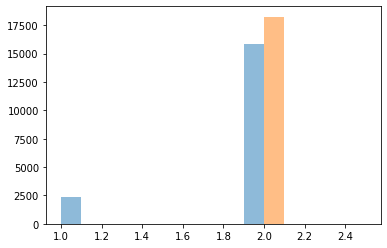

In [53]:
# Using Hist to compare actuals with predicted:
plt.hist(Y, alpha=0.5, label="Y")
plt.hist(svm.predict(X), alpha=0.5, label="Predict")
plt.show()

In [54]:
# Findout the score of full fit model:
svm.score(X, Y)

0.8688291052545066

In [55]:
# Findout the score of cross validation:
#score = cross_val_score(svm, X, Y, cv=10)
#print( 'Accuracy of dataset in svm model: %0.2f (+/- %0.2f)' % (score.mean(), score.std() * 2))

In [51]:
# When you've finished that, also take a moment to think about bias?
#Is there anything in this dataset that makes you think it could be biased, perhaps extremely so?